In [1]:
import pandas as pd
import yfinance as yf
import ta 
import numpy as np

In [2]:
df=yf.download('NFLX',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.947143,8.011429,7.864286,7.870000,7.870000,5291300
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
...,...,...,...,...,...,...
2022-12-01,303.989990,319.799988,303.029999,316.950012,316.950012,14664900
2022-12-02,310.489990,321.989990,310.000000,320.410004,320.410004,12683500
2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000


In [4]:
df['SMA200']=ta.trend.sma_indicator(df.Close,window=200)
df

,Open,High,Low,Close,Adj Close,Volume,SMA200
Date,,,,,,,
2009-12-31,7.947143,8.011429,7.864286,7.870000,7.870000,5291300,NaN
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600,NaN
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100,NaN
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,NaN
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,NaN
...,...,...,...,...,...,...,...
2022-12-01,303.989990,319.799988,303.029999,316.950012,316.950012,14664900,255.694701
2022-12-02,310.489990,321.989990,310.000000,320.410004,320.410004,12683500,255.306351
2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,254.935951


In [5]:
df['RSI']=ta.momentum.rsi(df.Close,window=10)

In [6]:
df['Signal']=np.where((df.Close>df.SMA200)&(df.RSI<30),True,False)

In [7]:
Buying_dates=[]
Selling_dates=[]

for i in range(len(df)):
    if df.Signal.iloc[i]:
        Buying_dates.append(df.iloc[i+1].name)
        for j in range(1,11):
            if df['RSI'].iloc[i+j]>40:
                Selling_dates.append(df.iloc[i+j+1].name)
                break
            elif j==10:
                Selling_dates.append(df.iloc[i+j+1].name)

In [8]:
frame=pd.DataFrame({'Buying_dates':Buying_dates,'Selling_dates':Selling_dates})

In [9]:
frame

,Buying_dates,Selling_dates
0,2011-08-05,2011-08-12
1,2011-08-08,2011-08-12
2,2011-08-09,2011-08-12
3,2011-08-11,2011-08-12
4,2013-04-05,2013-04-12
5,2013-04-08,2013-04-12
6,2013-04-09,2013-04-12
7,2014-01-08,2014-01-23
8,2014-01-09,2014-01-24
9,2014-01-10,2014-01-24


In [10]:
actualtrades=frame[frame.Buying_dates>frame.Selling_dates.shift(1)]
actualtrades

,Buying_dates,Selling_dates
4,2013-04-05,2013-04-12
7,2014-01-08,2014-01-23
16,2014-03-24,2014-04-07
28,2014-09-23,2014-09-30
30,2015-03-17,2015-03-25
31,2015-08-24,2015-08-27
33,2016-01-06,2016-01-07
34,2017-06-13,2017-06-22
35,2018-07-31,2018-08-07
38,2018-08-16,2018-08-22


In [11]:
frame[:1]

,Buying_dates,Selling_dates
0,2011-08-05,2011-08-12


In [12]:
actualtrades=frame[:1].append(actualtrades)
actualtrades

,Buying_dates,Selling_dates
0,2011-08-05,2011-08-12
4,2013-04-05,2013-04-12
7,2014-01-08,2014-01-23
16,2014-03-24,2014-04-07
28,2014-09-23,2014-09-30
30,2015-03-17,2015-03-25
31,2015-08-24,2015-08-27
33,2016-01-06,2016-01-07
34,2017-06-13,2017-06-22
35,2018-07-31,2018-08-07


In [13]:
profits=\
df.loc[actualtrades.Selling_dates].Open.values-df.loc[actualtrades.Buying_dates].Open.values
profits

array([  -0.2142868 ,    1.92428589,    7.23857117,   -9.28285599,
          1.58143234,    2.97142792,   26.19000244,   11.06999969,
          0.75      ,   21.72000122,    8.58999634,   12.69000244,
         12.90002441,   16.92999268, -153.91003418])

In [14]:
len([i for i in profits if i>0])

12

In [15]:
len([i for i in profits if i<0])

3

In [16]:
len([i for i in profits if i>0])/len(profits)#win Rates in 12 years

0.8

In [17]:
relprofit=\
(df.loc[actualtrades.Selling_dates].Open.values-df.loc[actualtrades.Buying_dates].Open.values)/df.loc[actualtrades.Buying_dates].Open.values

In [18]:
relprofit

array([-0.00603528,  0.08237525,  0.15047664, -0.16025054,  0.02508902,
        0.04976195,  0.29509862,  0.10513819,  0.00485814,  0.06551839,
        0.02603818,  0.03905337,  0.02090427,  0.02886959, -0.27764554])

In [19]:
relprofit.mean()#on average it makes 1% profit per trande

0.029950016073060217

In [20]:
#end of the day my 1 dollar investment by this strategy
(relprofit+1).cumprod()#1.26001532-1=26%

array([0.99396472, 1.07584282, 1.23773202, 1.0393848 , 1.06546194,
       1.1184814 , 1.44854372, 1.60084097, 1.60861809, 1.71401215,
       1.75864191, 1.82732281, 1.86552166, 1.9193785 , 1.38647163])

In [21]:
def getactuals(df):
    Buying_dates=[]
    Selling_dates=[]
    for i in range(len(df)-11):
        if df.Signal.iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i+j]>40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    frame=pd.DataFrame({'Buying_dates':Buying_dates,'Selling_dates':Selling_dates})
    actualtrades=frame[frame.Buying_dates>frame.Selling_dates.shift(1)]
    actualtrades=frame[:1].append(actualtrades)
    return(actualtrades)

In [22]:
def tacalc(df):
    df['SMA200']=ta.trend.sma_indicator(df.Close,window=200)
    df['RSI']=ta.momentum.rsi(df.Close,window=10)
    df['Signal']=np.where((df.Close>df.SMA200)&(df.RSI<30),True,False)

In [23]:
df=yf.download('BTC-USD',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-04,16908.169922,17157.767578,16903.439453,17130.486328,17130.486328,16824520830
2022-12-05,17128.894531,17378.152344,16922.431641,16974.826172,16974.826172,22209086834
2022-12-06,16975.238281,17091.863281,16939.921875,17089.503906,17089.503906,19889922369


In [24]:
tacalc(df)

In [25]:
actualtrades=getactuals(df)
actualtrades

,Buying_dates,Selling_dates
0,2015-08-09,2015-08-12
1,2016-01-16,2016-01-21
2,2016-08-02,2016-08-11
5,2016-08-16,2016-08-21
6,2017-03-19,2017-03-22
7,2017-07-16,2017-07-18
9,2017-09-15,2017-09-19
10,2018-02-02,2018-02-10
13,2019-09-25,2019-10-05
15,2020-09-04,2020-09-13


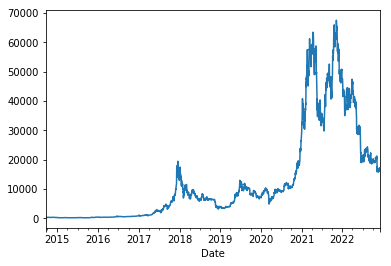

In [26]:
df['Close'].plot()

In [27]:
profits=\
df.loc[actualtrades.Selling_dates].Open.values-df.loc[actualtrades.Buying_dates].Open.values
profits

array([    9.48199463,    54.55899048,   -14.27294922,    14.69604492,
         143.92004395,   241.54003906,   907.48999023,  -422.20019531,
        -393.27929688,   222.03417969,  2290.49609375, -7099.0078125 ,
         913.22265625])

In [28]:
relprofit.mean()

0.029950016073060217

In [29]:
relprofit=\
(df.loc[actualtrades.Selling_dates].Open.values-df.loc[actualtrades.Buying_dates].Open.values)/df.loc[actualtrades.Buying_dates].Open.values

In [30]:
relprofit

array([ 0.03631334,  0.1494468 , -0.0235373 ,  0.02590785,  0.14734885,
        0.12125626,  0.28660897, -0.04618106, -0.04571193,  0.02170345,
        0.04426951, -0.15294345,  0.01856086])

In [31]:
relprofit.mean()

0.04484939598484049

In [32]:
(relprofit+1).cumprod()

array([1.03631334, 1.19118705, 1.16314972, 1.19328443, 1.36911352,
       1.53512711, 1.9751083 , 1.88389571, 1.7977792 , 1.83679721,
       1.91811133, 1.62474875, 1.65490549])

In [33]:
tickers=['MSFT','AAPL','TSLA','META','NFLX','BTC-USD']

In [34]:
matrixprofit=[]

In [35]:
for i in tickers:
    df=yf.download(i,start='2010-01-01')
    tacalc(df)
    actualtrades=getactuals(df)
    relprofit=\
(df.loc[actualtrades.Selling_dates].Open.values-df.loc[actualtrades.Buying_dates].Open.values)/df.loc[actualtrades.Buying_dates].Open.values
    matrixprofit.append(relprofit)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
matrixprofit

[array([-0.02713913,  0.01511663, -0.02134043,  0.03563936,  0.00630911,
         0.04302849,  0.05726974, -0.02024055, -0.02491304,  0.00892857,
         0.04778724,  0.03379217, -0.00807133,  0.03026054,  0.14034511,
         0.01964433,  0.0080673 , -0.06987102]),
 array([ 0.04445172,  0.03067226,  0.03033861,  0.02918936,  0.04434279,
         0.00952766,  0.04734535, -0.04219035, -0.0019707 ,  0.0155075 ,
        -0.02162751,  0.03337886,  0.01803371,  0.05981927,  0.03757273,
         0.02234734,  0.01889808,  0.06336707]),
 array([ 0.0320399 , -0.10917355,  0.03383455,  0.0505393 ,  0.04483891,
         0.02164287,  0.04050305,  0.01363721,  0.00768744,  0.16134183,
         0.08480204,  0.11858292,  0.009592  ,  0.1246452 ]),
 array([ 0.01675761,  0.04462074,  0.12844365,  0.0124407 ,  0.1566922 ,
        -0.05907083,  0.00508461,  0.02476729,  0.01597127,  0.02744904,
         0.02091187,  0.06743628,  0.03435134, -0.11755164,  0.06909159,
        -0.08345889]),
 array([-0.006

In [37]:
for i in matrixprofit:
    print(i)

[-0.02713913  0.01511663 -0.02134043  0.03563936  0.00630911  0.04302849
  0.05726974 -0.02024055 -0.02491304  0.00892857  0.04778724  0.03379217
 -0.00807133  0.03026054  0.14034511  0.01964433  0.0080673  -0.06987102]
[ 0.04445172  0.03067226  0.03033861  0.02918936  0.04434279  0.00952766
  0.04734535 -0.04219035 -0.0019707   0.0155075  -0.02162751  0.03337886
  0.01803371  0.05981927  0.03757273  0.02234734  0.01889808  0.06336707]
[ 0.0320399  -0.10917355  0.03383455  0.0505393   0.04483891  0.02164287
  0.04050305  0.01363721  0.00768744  0.16134183  0.08480204  0.11858292
  0.009592    0.1246452 ]
[ 0.01675761  0.04462074  0.12844365  0.0124407   0.1566922  -0.05907083
  0.00508461  0.02476729  0.01597127  0.02744904  0.02091187  0.06743628
  0.03435134 -0.11755164  0.06909159 -0.08345889]
[-0.00603528  0.08237525  0.15047664 -0.16025054  0.02508902  0.04976195
  0.29509862  0.10513819  0.00485814  0.06551839  0.02603818  0.03905337
  0.02090427  0.02886959 -0.27764554]
[ 0.0363

In [38]:
avgs=[]
for i in matrixprofit:
    if len(i)>0:
        avgs.append(i.mean())

In [39]:
avgs

[0.015256283767030698,
 0.024389097272420907,
 0.0453224062583318,
 0.022746051523165965,
 0.029950016073060217,
 0.04484939598484049]

In [40]:
sum(avgs)

0.18251325087885006

In [41]:
max(avgs)

0.0453224062583318

In [42]:
avgs.index(max(avgs))

2

In [43]:
tickers[2]#max profitable assets

'TSLA'